# Setup

### Activate inline plotting

In [1]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


### Import Dataset(s)

In [2]:
from tracking import Hough
from hits import AllHits

In [3]:
hit_data = AllHits('../data/signal.root')
print hit_data.n_events

38996


###Define Finding Algorithm

In [4]:
%time
hough = Hough(hit_data)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


### Drawing Function(s)

In [5]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)   

###Check Data Access

[  45   46   85  239  240  274  275  452  453  488  489  490  658  659  691
  692  883  884  885  916  917  918 1101 1102 1103 1129 1130 1131 1341 1342
 1343 1366 1367 1368 1369 1571 1572 1573 1590 1591 1592 1593 1823 1824 1825
 1826 1827 1828 1836 1837 1838 1839 1840 1841 1842 2068 2069 2070 2071 2072
 2073 2074 2075]
[193, 194, 35, 392, 393, 223, 224, 609, 610, 435, 436, 437, 820, 821, 637, 638, 1049, 828, 829, 860, 861, 862, 1272, 1273, 1274, 1072, 1073, 1074, 1282, 1283, 1284, 1307, 1308, 1309, 1310, 1751, 1512, 1513, 1530, 1531, 1532, 1533, 1761, 1762, 1763, 1764, 1765, 1766, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]


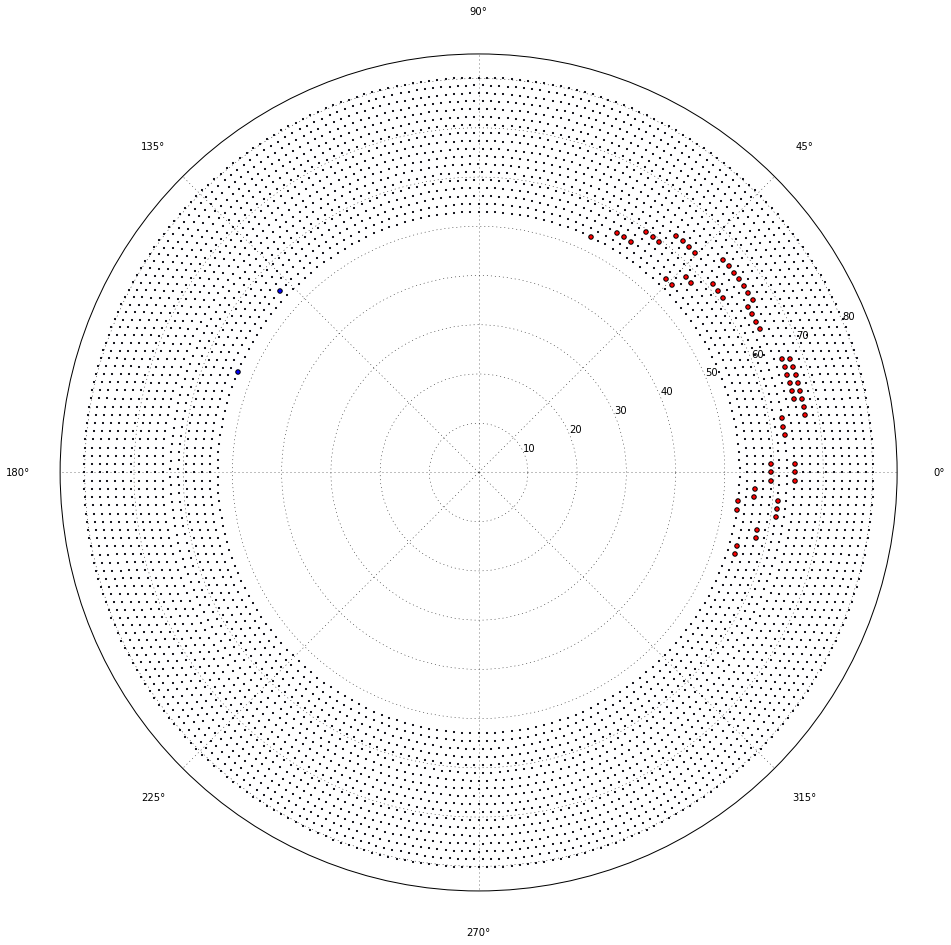

In [14]:
setup_plot_for_detector()
rhos, phis = hit_data.cydet.get_points_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)

sig = hit_data.get_sig_wires(10)
print sig
bkg = hit_data.get_bkg_wires(10)
sig = [hit_data.cydet.rotate_wire(wire,0.75) for wire in sig]
print sig
scatter(phis[sig],rhos[sig], marker='o', c='r')
scatter(phis[bkg],rhos[bkg], marker='o', c='b')

###Check the Hough Correspondence

665


/usr/lib64/python2.7/site-packages/scipy/sparse/lil.py:233: SparseEfficiencyWarning: Indexing into a lil_matrix with multiple indices is slow. Pre-converting to CSC or CSR beforehand is more efficient.
  SparseEfficiencyWarning)


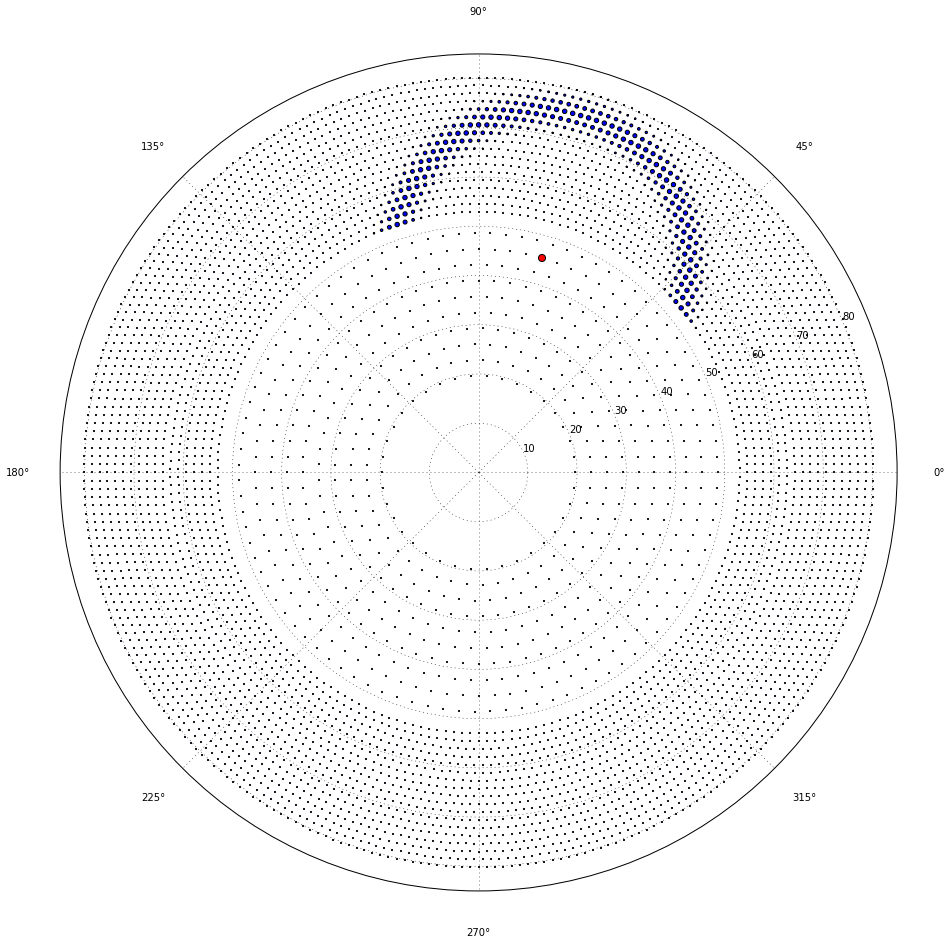

In [10]:
from scipy.sparse import find
trk_0 = 500
wire_0 = 10000
corr_track = find(hough.correspondence[:,trk_0])[0]
signal_size = find(hough.correspondence[:,trk_0])[2]
setup_plot_for_detector()
rhos, phis = hough.hit_data.cydet.get_points_rhos_and_phis()
t_rhos, t_phis = hough.track.get_points_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)
scatter(t_phis, t_rhos, marker='.', s=5)

scatter(phis[corr_track],rhos[corr_track], signal_size*100, marker='o', c='b')
scatter(t_phis[trk_0],t_rhos[trk_0], marker='o', s=50, c='r')

print hough.track.n_points

In [ ]:
from scipy.sparse import find
wire_0 = 1000
corr_track = find(hough.correspondence[wire_0,:])[1]
signal_size = find(hough.correspondence[wire_0,:])[2]
setup_plot_for_detector()
rhos, phis = hough.hit_data.cydet.get_points_rhos_and_phis()
t_rhos, t_phis = hough.track.get_points_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)
scatter(t_phis, t_rhos, marker='.', s=5)

scatter(t_phis[corr_track],t_rhos[corr_track], signal_size*100, marker='o', c='b')
scatter(phis[wire_0],rhos[wire_0], marker='o', s=50, c='r')

print hough.track.n_points